# Scrapping Data

In [1]:
from bs4 import BeautifulSoup 
import requests 
import csv
import pandas as pd
import numpy as np

In [3]:
descriptions = [] 
processors=[]
ram=[]
os=[]
rom=[]
inches=[]
warranty=[]
prices = []
ratings = []

In [6]:
pages = list(range(1,50))
for page in pages:
    req = requests.get("https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&as-backfill=on&page={}".format(page)).text 
    soup = BeautifulSoup(req,'html.parser')

    desc = soup.find_all('div' , class_='_4rR01T')
    for i in range(len(desc)):
        descriptions.append(desc[i].text)
    len(descriptions)

    commonclass = soup.find_all('li',class_='rgWa7D')
    for i in range(0,len(commonclass)):
        p=commonclass[i].text 
        if("Core" in p): 
            processors.append(p)
        elif("RAM" in p): 
            ram.append(p)
        elif("HDD" in p or "SSD" in p):
            rom.append(p)
        elif("Operating" in p):
            os.append(p)
        elif("inch" in p):
            inches.append(p)
        elif("Warranty" in p):
            warranty.append(p)
     

    price = soup.find_all('div',class_='_30jeq3 _1_WHN1') 
    for i in range(len(price)):
        prices.append(price[i].text)
        len(prices)
            

    rating = soup.find_all('div',class_='_3LWZlK') 
    for i in range(len(rating)):
        ratings.append(rating[i].text)
        len(ratings)

In [7]:
print(len(descriptions))
print(len(processors))
print(len(ram))
print(len(os))
print(len(rom))
print(len(warranty))
print(len(inches))
print(len(prices))
print(len(ratings))

929
904
929
937
914
838
758
905
1223


In [8]:
df = {'Description':descriptions[slice(700)],
      'Processor':processors[slice(700)],
      'RAM':ram[slice(700)],
      'Operating System':os[slice(700)],
      'ROM':rom[slice(700)],'Display':inches[slice(700)],
      'Warranty':warranty[slice(700)],
      'Price':prices[slice(700)],
      'Rating':ratings[slice(700)]}
dataset = pd.DataFrame(data = df)

In [9]:
dataset

,Description,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating
0,HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5
1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4
2,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3
4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4
...,...,...,...,...,...,...,...,...,...
695,Lenovo Core i3 10th Gen - (8 GB/256 GB SSD/Win...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹44,340",3.8
696,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹44,340",4
697,Lenovo Thinpad E15 G2 Core i5 11th Gen - (8 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹2,34,940",4.1
698,ASUS ROG Zephyrus G15 (2021) Ryzen 9 Octa Core...,Intel Core i3 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹44,326",4.7


In [10]:
dataset.to_csv('laptops.csv')

In [11]:
df = pd.read_csv('laptops.csv')

In [12]:
df.head()

,Unnamed: 0,Description,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating
0,0,HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5
1,1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4
2,2,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3
3,3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3
4,4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4


In [13]:
df.shape

(700, 10)

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('laptops.csv')

In [4]:
df.head()

,Unnamed: 0,Description,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating
0,0,HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5
1,1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4
2,2,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3
3,3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3
4,4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4


In [5]:
df.shape

(700, 10)

In [6]:
df.isnull().sum()

Unnamed: 0          0
Description         0
Processor           0
RAM                 0
Operating System    0
ROM                 0
Display             0
Warranty            0
Price               0
Rating              0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'Description', 'Processor', 'RAM', 'Operating System',
       'ROM', 'Display', 'Warranty', 'Price', 'Rating'],
      dtype='object')

In [8]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
df.head()

,Description,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating
0,HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5
1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4
2,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3
4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Description       700 non-null    object 
 1   Processor         700 non-null    object 
 2   RAM               700 non-null    object 
 3   Operating System  700 non-null    object 
 4   ROM               700 non-null    object 
 5   Display           700 non-null    object 
 6   Warranty          700 non-null    object 
 7   Price             700 non-null    object 
 8   Rating            700 non-null    float64
dtypes: float64(1), object(8)
memory usage: 49.3+ KB


In [11]:
df.dtypes

Description          object
Processor            object
RAM                  object
Operating System     object
ROM                  object
Display              object
Warranty             object
Price                object
Rating              float64
dtype: object

In [12]:
df1 = df.copy()

In [13]:
df1.head()

,Description,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating
0,HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5
1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4
2,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3
3,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3
4,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4


### Brand and Name

In [14]:
df1.Description

0      HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...
1      HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...
2      ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...
3      Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...
4      acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...
                             ...                        
695    Lenovo Core i3 10th Gen - (8 GB/256 GB SSD/Win...
696    DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...
697    Lenovo Thinpad E15 G2 Core i5 11th Gen - (8 GB...
698    ASUS ROG Zephyrus G15 (2021) Ryzen 9 Octa Core...
699    HP Pavilion Ryzen 5 Hexa Core 5500U - (8 GB/51...
Name: Description, Length: 700, dtype: object

In [15]:
df1['Brand'] = df1['Description'].apply(lambda x:x.split(' ')[0])

In [16]:
df1['Name'] = df1['Description'].apply(lambda x:x.split('-')[0])

In [17]:
df1['Brand'].groupby(df1['Brand']).count().sort_values(ascending=False)

Brand
ASUS         181
HP           158
DELL         112
Lenovo       112
acer          39
MSI           32
APPLE         26
Infinix        7
lenovo         4
ALIENWARE      4
LG             4
Avita          4
Nokia          3
RedmiBook      3
realme         3
MICROSOFT      2
Mi             2
Vaio           2
SAMSUNG        1
Smartron       1
Name: Brand, dtype: int64

In [18]:
df1['Brand'].unique()

array(['HP', 'ASUS', 'Lenovo', 'acer', 'DELL', 'APPLE', 'MSI',
       'RedmiBook', 'realme', 'Infinix', 'lenovo', 'Nokia', 'Mi',
       'SAMSUNG', 'Avita', 'ALIENWARE', 'MICROSOFT', 'Vaio', 'LG',
       'Smartron'], dtype=object)

In [19]:
df1['Brand'].replace('lenovo','Lenovo', inplace = True)

In [20]:
df1['Brand'].unique()

array(['HP', 'ASUS', 'Lenovo', 'acer', 'DELL', 'APPLE', 'MSI',
       'RedmiBook', 'realme', 'Infinix', 'Nokia', 'Mi', 'SAMSUNG',
       'Avita', 'ALIENWARE', 'MICROSOFT', 'Vaio', 'LG', 'Smartron'],
      dtype=object)

In [21]:
df1.drop('Description', axis = 1, inplace = True)

In [22]:
df1.head()

,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating,Brand,Name
0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U
1,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen
2,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen
3,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen
4,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen


### Processor

In [23]:
df1.Processor.unique()

array(['AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i3 Processor (11th Gen)',
       'Intel Core i3 Processor (10th Gen)',
       'Intel Core i5 Processor (10th Gen)',
       'Intel Core i5 Processor (11th Gen)',
       'AMD Ryzen 3 Dual Core Processor (3rd Gen)',
       'AMD Ryzen 3 Dual Core Processor',
       'Intel Celeron Dual Core Processor',
       'Intel Core i7 Processor (10th Gen)',
       'Intel Hexa Core i5 Processor (10th Gen)',
       'Intel Pentium Quad Core Processor',
       'AMD Ryzen 7 Octa Core Processor',
       'Intel Core i5 Processor (9th Gen)',
       'AMD Ryzen 3 Quad Core Processor',
       'Intel Core i7 Processor (11th Gen)',
       'AMD Ryzen 5 Quad Core Processor',
       'Intel Evo platform feat 11th Gen Intel Core i5 processor',
       'AMD Ryzen 9 Octa Core Processor',
       'Intel Core i9 Processor (11th Gen)',
       'Intel Evo platform feat 11th Gen Intel Core i7 processor',
       'Intel Core i9 Processor (12th Gen)',
       'Intel Ryzen 

In [24]:
df1['Processor_brand'] = df1['Processor'].apply(lambda x : x.split(' ')[0])

In [25]:
df1.head()

,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating,Brand,Name,Processor_brand
0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD
1,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen,Intel
2,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel
3,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel
4,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel


In [26]:
df1['Processor_type'] = df1['Processor'].apply(lambda x : x.split(' ')[1:-1])

In [27]:
df1.Processor_type = df1.Processor_type.apply(lambda x : ' '.join(x))

In [28]:
df1.head()

,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating,Brand,Name,Processor_brand,Processor_type
0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD,Ryzen 5 Hexa Core
1,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen,Intel,Core i3 Processor (11th
2,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel,Core i3 Processor (10th
3,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel,Core i3 Processor (10th
4,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel,Core i5 Processor (10th


In [29]:
df1.Processor_type.unique()

array(['Ryzen 5 Hexa Core', 'Core i3 Processor (11th',
       'Core i3 Processor (10th', 'Core i5 Processor (10th',
       'Core i5 Processor (11th', 'Ryzen 3 Dual Core Processor (3rd',
       'Ryzen 3 Dual Core', 'Celeron Dual Core',
       'Core i7 Processor (10th', 'Hexa Core i5 Processor (10th',
       'Pentium Quad Core', 'Ryzen 7 Octa Core', 'Core i5 Processor (9th',
       'Ryzen 3 Quad Core', 'Core i7 Processor (11th',
       'Ryzen 5 Quad Core', 'Evo platform feat 11th Gen Intel Core i5',
       'Ryzen 9 Octa Core', 'Core i9 Processor (11th',
       'Evo platform feat 11th Gen Intel Core i7',
       'Core i9 Processor (12th', 'Ryzen 7 Hexa Core', 'APU Dual Core A6',
       'Ryzen 5 Hexa Core Processor (5th',
       'Ryzen 7 Octa Core Processor (4th',
       'Ryzen 7 Octa Core Processor (5th', 'Core i5 Processor (8th',
       'Ryzen 9 Octa Core Processor (5th', 'Core i7 Processor (8th',
       'Core i9 Processor (10th', 'Dual Core', 'Core i7 Processor (9th',
       'Core i5 Pro

In [30]:
df1.Processor_type =df1.Processor_type.apply(lambda x: x.split('Processor')[0]    if ('Processor' in x) else x)

In [31]:
df1.head()

,Processor,RAM,Operating System,ROM,Display,Warranty,Price,Rating,Brand,Name,Processor_brand,Processor_type
0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD,Ryzen 5 Hexa Core
1,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen,Intel,Core i3
2,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel,Core i3
3,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel,Core i3
4,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel,Core i5


### Display

In [32]:
 df1['Display'].unique()

array(['39.62 cm (15.6 inch) Display', '35.56 cm (14 inch) Display',
       '33.78 cm (13.3 inch) Display', '35.81 cm (14.1 inch) Display',
       '36.07 cm (14.2 inch) Display', '43.94 cm (17.3 inch) Display',
       '35.56 cm (14 inch) Touchscreen Display',
       '39.62 cm (15.6 inches) Display', '38.1 cm (15 inch) Display',
       '41.15 cm (16.2 inch) Display', '35.56 cm (14 inches) Display',
       '39.62 cm (15.6 inch) Touchscreen Display',
       '33.78 cm (13.3 inch) Touchscreen Display',
       '33.02 cm (13 inch) Display',
       '29.46 cm (11.6 inch) Touchscreen Display',
       '15.6 inch Full HD LED Backlit Anti-glare IPS Display, 300 Hz, 300 Nits',
       '43.94 cm (17.3 inch) Touchscreen Display',
       '34.04 cm (13.4 inch) Touchscreen Display',
       '38.1 cm (15 inch) Touchscreen Display',
       '40.89 cm (16.1 inch) Display', '40.64 cm (16 inch) Display',
       '33.78 cm (13.3 inches) Display',
       '34.29 cm (13.5 inch) Touchscreen Display',
       '29.46 cm 

In [33]:
df1['Display_cm'] = df1['Display'].apply(lambda x:x.split(' ')[0])

In [34]:
df1.Display_cm.unique()

array(['39.62', '35.56', '33.78', '35.81', '36.07', '43.94', '38.1',
       '41.15', '33.02', '29.46', '15.6', '34.04', '40.89', '40.64',
       '34.29', '38.0', '30.99', '30.48'], dtype=object)

In [35]:
df1['Display_cm'] = df1['Display_cm'].astype(np.float64)

In [36]:
df1.Display_cm.unique()

array([39.62, 35.56, 33.78, 35.81, 36.07, 43.94, 38.1 , 41.15, 33.02,
       29.46, 15.6 , 34.04, 40.89, 40.64, 34.29, 38.  , 30.99, 30.48])

In [37]:
df1.drop('Display', axis = 1, inplace = True)

In [38]:
df1.head()

,Processor,RAM,Operating System,ROM,Warranty,Price,Rating,Brand,Name,Processor_brand,Processor_type,Display_cm
0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD,Ryzen 5 Hexa Core,39.62
1,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen,Intel,Core i3,39.62
2,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel,Core i3,39.62
3,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel,Core i3,39.62
4,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel,Core i5,39.62


### RAM

In [39]:
df1['RAM'].unique()

array(['8 GB DDR4 RAM', '4 GB DDR4 RAM', '16 GB DDR4 RAM',
       '4 GB LPDDR4 RAM', '16 GB Unified Memory RAM', '16 GB LPDDR4X RAM',
       '8 GB LPDDR4X RAM', '32 GB DDR4 RAM', '16 GB DDR5 RAM',
       '32 GB Unified Memory RAM', '32 GB DDR5 RAM', '4 GB LPDDR4X RAM',
       '8 GB DDR3 RAM', '16 GB DDR3 RAM', '8 GB LPDDR3 RAM',
       '16 GB LPDDR3 RAM', '32 GB LPDDR4X RAM', '4 GB DDR3 RAM',
       '16 GB LPDDR4 RAM'], dtype=object)

In [40]:
df1['RAM_GB'] = df1['RAM'].apply(lambda x:x.split(' ')[0])

In [41]:
df1['RAM_GB'].unique()

array(['8', '4', '16', '32'], dtype=object)

In [42]:
df1['RAM_GB'].replace('Upgradable',0, inplace = True)

In [43]:
df1['RAM_GB'].unique()

array(['8', '4', '16', '32'], dtype=object)

In [44]:
df1['RAM_GB'] = df1['RAM_GB'].astype(np.int64)

In [45]:
df1['RAM_type'] = df1['RAM'].apply(lambda x:x.split(' ')[2])

In [46]:
df1['RAM_type'].unique()

array(['DDR4', 'LPDDR4', 'Unified', 'LPDDR4X', 'DDR5', 'DDR3', 'LPDDR3'],
      dtype=object)

In [47]:
df1.RAM_type.mode()

0    DDR4
dtype: object

In [48]:
df1.RAM_type = df1.RAM_type.replace('Unified','DDR4')

In [49]:
df1.drop('RAM', axis = 1, inplace = True)

In [50]:
df1.head()

,Processor,Operating System,ROM,Warranty,Price,Rating,Brand,Name,Processor_brand,Processor_type,Display_cm,RAM_GB,RAM_type
0,AMD Ryzen 5 Hexa Core Processor,64 bit Windows 10 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD,Ryzen 5 Hexa Core,39.62,8,DDR4
1,Intel Core i3 Processor (11th Gen),64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen,Intel,Core i3,39.62,8,DDR4
2,Intel Core i3 Processor (10th Gen),64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel,Core i3,39.62,8,DDR4
3,Intel Core i3 Processor (10th Gen),Windows 10 Operating System,256 GB SSD,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel,Core i3,39.62,8,DDR4
4,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,512 GB SSD,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel,Core i5,39.62,8,DDR4


### ROM

In [51]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       'PCI-e SSD (NVMe) ready,Cooler Boost,Matrix Display (Extend),Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel',
       '1 TB SSD',
       'PCI-e SSD (NVMe) ready,SHIFT,Silver-Lining Print,Cooler Boost 5,Audio Boost,Dragon Center,Nahimic 3,Narrow Bezel, 144Hz Panel',
       '1 TB HDD|512 GB SSD',
       'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center',
       '128 GB SSD', '2 TB SSD',
       'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel, MSI Cente, Silky Smooth Touchpad, Military-Grade Durability',
       'PCI-e SSD (NVMe) ready,Cooler Boost,Hi-Res Audio,Nahimic 3,Thin Bezel,Military-Grade Durability',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD'

In [52]:
df1.ROM = df1.ROM.apply(lambda x : 'NaN' if ('PCI' in x) else x)

In [53]:
df1.ROM = df1.ROM.replace('M.2 Slot for SSD Upgrade','NaN')

In [54]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       'NaN', '1 TB SSD', '1 TB HDD|512 GB SSD', '128 GB SSD', '2 TB SSD',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD',
       '128 GB SSD for Reduced Boot Up Time and In Game Loading'],
      dtype=object)

In [55]:
df1['ROM_type'] = df1['ROM'].apply(lambda x : 'both'  if ('|' in x) else x)

In [56]:
df1['ROM_type'] = df1.ROM_type.apply(lambda x: 'HDD' if ('HDD' in x) else x )

In [57]:
df1['ROM_type'] = df1.ROM_type.apply(lambda x: 'SSD' if ('SSD' in x) else x )

In [58]:
df1.head()

,Processor,Operating System,ROM,Warranty,Price,Rating,Brand,Name,Processor_brand,Processor_type,Display_cm,RAM_GB,RAM_type,ROM_type
0,AMD Ryzen 5 Hexa Core Processor,64 bit Windows 10 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹57,949",4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD,Ryzen 5 Hexa Core,39.62,8,DDR4,SSD
1,Intel Core i3 Processor (11th Gen),64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹41,940",4.4,HP,HP Core i3 11th Gen,Intel,Core i3,39.62,8,DDR4,SSD
2,Intel Core i3 Processor (10th Gen),64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,"₹37,940",4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel,Core i3,39.62,8,DDR4,SSD
3,Intel Core i3 Processor (10th Gen),Windows 10 Operating System,256 GB SSD,2 Years Warranty,"₹37,940",4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel,Core i3,39.62,8,DDR4,SSD
4,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,512 GB SSD,1 Year International Travelers Warranty,"₹50,940",4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel,Core i5,39.62,8,DDR4,SSD


In [59]:
df1.ROM_type.unique()

array(['SSD', 'both', 'HDD', 'NaN'], dtype=object)

In [60]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       'NaN', '1 TB SSD', '1 TB HDD|512 GB SSD', '128 GB SSD', '2 TB SSD',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD',
       '128 GB SSD for Reduced Boot Up Time and In Game Loading'],
      dtype=object)

In [61]:
df1.ROM = df1.ROM.apply(lambda x : x.replace('SSD for Reduced Boot Up Time and in Game Loading','')    if ('SSD for Reduced Boot Up Time and in Game Loading' in x) else x)

In [62]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       'NaN', '1 TB SSD', '1 TB HDD|512 GB SSD', '128 GB SSD', '2 TB SSD',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD',
       '128 GB SSD for Reduced Boot Up Time and In Game Loading'],
      dtype=object)

In [63]:
df1.ROM = df1.ROM.apply(lambda x : x.replace('SSD for Reduced Boot Up Time and In Game Loading','')    if ('SSD for Reduced Boot Up Time and In Game Loading' in x) else x)

In [64]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       'NaN', '1 TB SSD', '1 TB HDD|512 GB SSD', '128 GB SSD', '2 TB SSD',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD',
       '128 GB '], dtype=object)

In [65]:
df1.ROM = df1.ROM.apply(lambda x : x.strip(' '))

In [66]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       'NaN', '1 TB SSD', '1 TB HDD|512 GB SSD', '128 GB SSD', '2 TB SSD',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD',
       '128 GB'], dtype=object)

In [67]:
df1.ROM.mode()

0    512 GB SSD
dtype: object

In [68]:
df1['ROM'] = df1['ROM'].replace('NaN','512 GB SSD')

In [69]:
df1.ROM.unique()

array(['512 GB SSD', '256 GB SSD', '1 TB HDD|256 GB SSD', '1 TB HDD',
       '1 TB SSD', '1 TB HDD|512 GB SSD', '128 GB SSD', '2 TB SSD',
       '512 GB HDD|512 GB SSD', '1 TB HDD|128 GB SSD', '3 TB SSD',
       '128 GB'], dtype=object)

### Price

In [70]:
df1['Price']

0        ₹57,949
1        ₹41,940
2        ₹37,940
3        ₹37,940
4        ₹50,940
         ...    
695      ₹44,340
696      ₹44,340
697    ₹2,34,940
698      ₹44,326
699      ₹59,940
Name: Price, Length: 700, dtype: object

In [71]:
df1['Price'] = df1['Price'].apply(lambda x:x[1:])

In [72]:
df1['Price'] = df1['Price'].str.replace(',','')

In [73]:
df1['Price']

0       57949
1       41940
2       37940
3       37940
4       50940
        ...  
695     44340
696     44340
697    234940
698     44326
699     59940
Name: Price, Length: 700, dtype: object

In [74]:
df1['Price'] = df1['Price'].astype(np.int64)

In [75]:
df1.head()

,Processor,Operating System,ROM,Warranty,Price,Rating,Brand,Name,Processor_brand,Processor_type,Display_cm,RAM_GB,RAM_type,ROM_type
0,AMD Ryzen 5 Hexa Core Processor,64 bit Windows 10 Operating System,512 GB SSD,1 Year Onsite Warranty,57949,4.5,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,AMD,Ryzen 5 Hexa Core,39.62,8,DDR4,SSD
1,Intel Core i3 Processor (11th Gen),64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,41940,4.4,HP,HP Core i3 11th Gen,Intel,Core i3,39.62,8,DDR4,SSD
2,Intel Core i3 Processor (10th Gen),64 bit Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty,37940,4.3,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,Intel,Core i3,39.62,8,DDR4,SSD
3,Intel Core i3 Processor (10th Gen),Windows 10 Operating System,256 GB SSD,2 Years Warranty,37940,4.3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Intel,Core i3,39.62,8,DDR4,SSD
4,Intel Core i5 Processor (10th Gen),64 bit Windows 10 Operating System,512 GB SSD,1 Year International Travelers Warranty,50940,4.4,acer,acer Aspire 7 Core i5 10th Gen,Intel,Core i5,39.62,8,DDR4,SSD


### Data Types

In [76]:
df1.dtypes

Processor            object
Operating System     object
ROM                  object
Warranty             object
Price                 int64
Rating              float64
Brand                object
Name                 object
Processor_brand      object
Processor_type       object
Display_cm          float64
RAM_GB                int64
RAM_type             object
ROM_type             object
dtype: object

### Reindexing Columns

In [77]:
new_cols = ['Brand', 'Name', 'Operating System', 'Processor', 'Processor_brand','Processor_type', 'Warranty', 'RAM_GB', 'RAM_type', 'ROM', 'ROM_type', 'Display_cm', 'Price', 'Rating']

In [78]:
df1 = df1[new_cols]

In [79]:
df1

,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
0,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,64 bit Windows 10 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,57949,4.5
1,HP,HP Core i3 11th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,41940,4.4
2,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,37940,4.3
3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Windows 10 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,2 Years Warranty,8,DDR4,256 GB SSD,SSD,39.62,37940,4.3
4,acer,acer Aspire 7 Core i5 10th Gen,64 bit Windows 10 Operating System,Intel Core i5 Processor (10th Gen),Intel,Core i5,1 Year International Travelers Warranty,8,DDR4,512 GB SSD,SSD,39.62,50940,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Lenovo,Lenovo Core i3 10th Gen,64 bit Windows 11 Operating System,AMD Ryzen 7 Octa Core Processor,AMD,Ryzen 7 Octa Core,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,35.56,44340,3.8
696,DELL,DELL Core i5 11th Gen,64 bit Windows 10 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Onsite Warranty,16,DDR4,1 TB SSD,SSD,35.56,44340,4.0
697,Lenovo,Lenovo Thinpad E15 G2 Core i5 11th Gen,64 bit Windows 10 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,1 TB HDD,HDD,39.62,234940,4.1
698,ASUS,ASUS ROG Zephyrus G15 (2021) Ryzen 9 Octa Core...,64 bit Windows 10 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,16,DDR4,512 GB SSD,SSD,35.56,44326,4.7


### Importing CSV file of cleaned Data

In [80]:
import pandas as pd

In [81]:
data = pd.DataFrame(data = df1)

In [82]:
data.to_csv('laptops20.csv')

In [83]:
laptops_data = pd.read_csv('laptops20.csv')

In [84]:
laptops_data

,Unnamed: 0,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
0,0,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,64 bit Windows 10 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,57949,4.5
1,1,HP,HP Core i3 11th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,41940,4.4
2,2,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,37940,4.3
3,3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Windows 10 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,2 Years Warranty,8,DDR4,256 GB SSD,SSD,39.62,37940,4.3
4,4,acer,acer Aspire 7 Core i5 10th Gen,64 bit Windows 10 Operating System,Intel Core i5 Processor (10th Gen),Intel,Core i5,1 Year International Travelers Warranty,8,DDR4,512 GB SSD,SSD,39.62,50940,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,Lenovo,Lenovo Core i3 10th Gen,64 bit Windows 11 Operating System,AMD Ryzen 7 Octa Core Processor,AMD,Ryzen 7 Octa Core,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,35.56,44340,3.8
696,696,DELL,DELL Core i5 11th Gen,64 bit Windows 10 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Onsite Warranty,16,DDR4,1 TB SSD,SSD,35.56,44340,4.0
697,697,Lenovo,Lenovo Thinpad E15 G2 Core i5 11th Gen,64 bit Windows 10 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,1 TB HDD,HDD,39.62,234940,4.1
698,698,ASUS,ASUS ROG Zephyrus G15 (2021) Ryzen 9 Octa Core...,64 bit Windows 10 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,16,DDR4,512 GB SSD,SSD,35.56,44326,4.7


In [85]:
laptops_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [86]:
laptops_data.head(10)

,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
0,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,64 bit Windows 10 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,57949,4.5
1,HP,HP Core i3 11th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,41940,4.4
2,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,37940,4.3
3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Windows 10 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,2 Years Warranty,8,DDR4,256 GB SSD,SSD,39.62,37940,4.3
4,acer,acer Aspire 7 Core i5 10th Gen,64 bit Windows 10 Operating System,Intel Core i5 Processor (10th Gen),Intel,Core i5,1 Year International Travelers Warranty,8,DDR4,512 GB SSD,SSD,39.62,50940,4.4
5,ASUS,ASUS VivoBook 15 (2021) Core i3 11th Gen,Windows 10 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,4,DDR4,256 GB SSD,SSD,39.62,35740,4.3
6,Lenovo,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,64 bit Windows 11 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Carry-In Warranty,8,DDR4,512 GB SSD,SSD,39.62,48940,4.4
7,HP,HP Core i5 11th Gen,64 bit Windows 11 Operating System,Intel Core i5 Processor (11th Gen),Intel,Core i5,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,54600,4.3
8,ASUS,ASUS Ryzen 3 Dual Core 3250U 3rd Gen,64 bit Windows 10 Operating System,AMD Ryzen 3 Dual Core Processor (3rd Gen),AMD,Ryzen 3 Dual Core,1 Year Onsite Warranty,8,DDR4,256 GB SSD,SSD,39.62,35940,4.3
9,DELL,DELL Inspiron Ryzen 3 Dual Core 3250U,64 bit Windows 11 Operating System,AMD Ryzen 3 Dual Core Processor,AMD,Ryzen 3 Dual Core,1 Year Onsite Warranty,8,DDR4,256 GB SSD,SSD,35.56,36940,4.2


In [87]:
laptops_data.shape

(700, 14)

# EDA(Exploratory Data Analysis)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
laptops_data.head()

,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
0,HP,HP Pavilion Ryzen 5 Hexa Core 5500U,64 bit Windows 10 Operating System,AMD Ryzen 5 Hexa Core Processor,AMD,Ryzen 5 Hexa Core,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,57949,4.5
1,HP,HP Core i3 11th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,41940,4.4
2,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,37940,4.3
3,Lenovo,Lenovo IdeaPad 3 Core i3 10th Gen,Windows 10 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,2 Years Warranty,8,DDR4,256 GB SSD,SSD,39.62,37940,4.3
4,acer,acer Aspire 7 Core i5 10th Gen,64 bit Windows 10 Operating System,Intel Core i5 Processor (10th Gen),Intel,Core i5,1 Year International Travelers Warranty,8,DDR4,512 GB SSD,SSD,39.62,50940,4.4


In [91]:
laptops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             700 non-null    object 
 1   Name              700 non-null    object 
 2   Operating System  700 non-null    object 
 3   Processor         700 non-null    object 
 4   Processor_brand   700 non-null    object 
 5   Processor_type    700 non-null    object 
 6   Warranty          700 non-null    object 
 7   RAM_GB            700 non-null    int64  
 8   RAM_type          700 non-null    object 
 9   ROM               700 non-null    object 
 10  ROM_type          694 non-null    object 
 11  Display_cm        700 non-null    float64
 12  Price             700 non-null    int64  
 13  Rating            700 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 76.7+ KB


In [92]:
laptops_data.describe()

,RAM_GB,Display_cm,Price,Rating
count,700.000000,700.000000,700.000000,700.000000
mean,10.205714,37.383543,75582.542857,4.330857
std,4.705091,3.306080,46468.078386,0.669244
min,4.000000,15.600000,18940.000000,1.000000
25%,8.000000,35.560000,48917.250000,4.100000
50%,8.000000,39.620000,59940.000000,4.400000
75%,16.000000,39.620000,84940.000000,4.700000
max,32.000000,43.940000,441940.000000,5.000000


## Problem Statement

1. Find the count of each brand available in the Data Frame
2. Find Laptop rating count
3. Price vs Rating
4. What is the distribution of laptop sold as per brand
5. a) Which laptops have rating equal to 5 and with in budget 50,000
   b) Laptops under INR 50,000
6. Laptops under INR 50,000
7. What is the costliest and cheapest product sold

## Countplot

### Count Brand wise Laptops

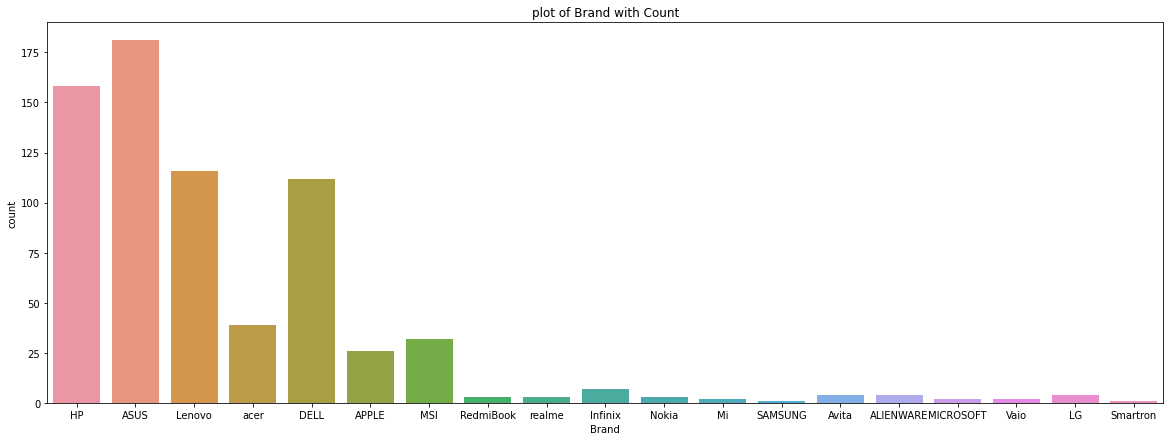

In [93]:
plt.figure(figsize = (20,7))
sns.countplot(x=laptops_data['Brand'])
plt.title('plot of Brand with Count')
plt.show()

In [94]:
laptops_data.Brand.value_counts()

ASUS         181
HP           158
Lenovo       116
DELL         112
acer          39
MSI           32
APPLE         26
Infinix        7
Avita          4
ALIENWARE      4
LG             4
realme         3
RedmiBook      3
Nokia          3
Mi             2
MICROSOFT      2
Vaio           2
SAMSUNG        1
Smartron       1
Name: Brand, dtype: int64

### observation :
1. In this dataframe ASUS brand has high number of laptops
2. HP has second highest number of laptops
3. Nokia,Mi, Samsung, Avita, Microsoft, Vaio, LG, Smartron seems to have very less number of laptops

### Categorization of laptops according to ratings

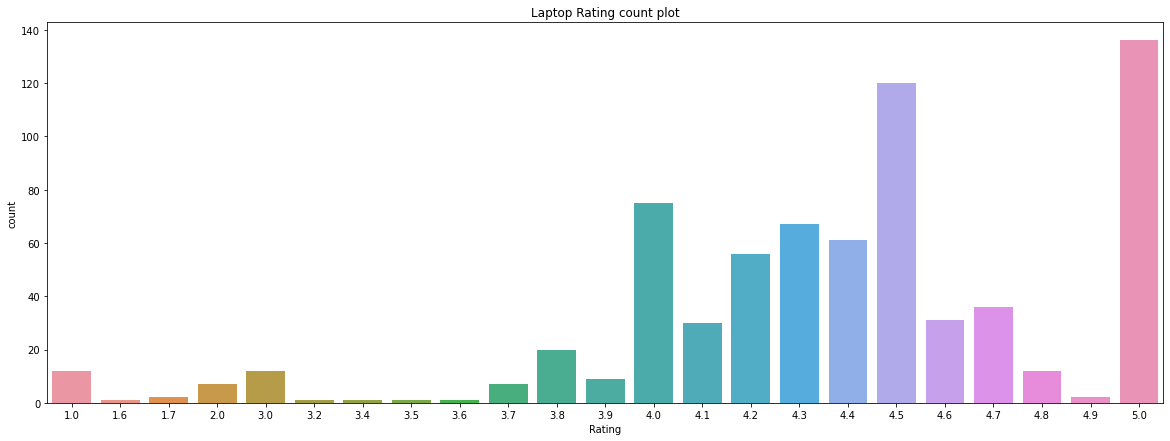

In [95]:
plt.figure(figsize = (20,7))
sns.countplot(x = laptops_data['Rating'])
plt.title('Laptop Rating count plot')
plt.show()

### Obseravtions:
1) 5 Rating got high number in this dataframe   
2) 1.6,1.7,3.2,3.4, 3.5,3.6 got low number in this dataframe around less than 5

### checking RAM_type value_counts

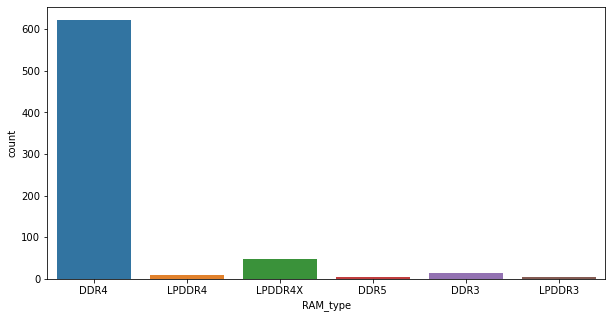

In [96]:
plt.figure(figsize = (10,5))
sns.countplot(x = laptops_data['RAM_type'])
plt.show()

### Obseravtions:
1. DDR4 has more laptops in  Dataframe
2. remaining all RAM types have very low laptops in Dataframe less than 100

## Barplot

### check Ram_GB value counts 

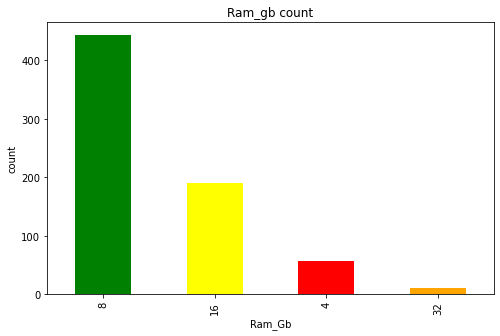

In [97]:
plt.figure(figsize=(8,5))
laptops_data['RAM_GB'].value_counts().plot.bar(color = ['Green','Yellow','Red','Orange'])
plt.xlabel('Ram_Gb')
plt.ylabel('count')
plt.title('Ram_gb count')
plt.show()

### observation:
1. 8 gb ram has high number in this Dataframe which is around 260
2. 32 gb ram has lowe number in this Dataframe which is around 10

### check Display count 

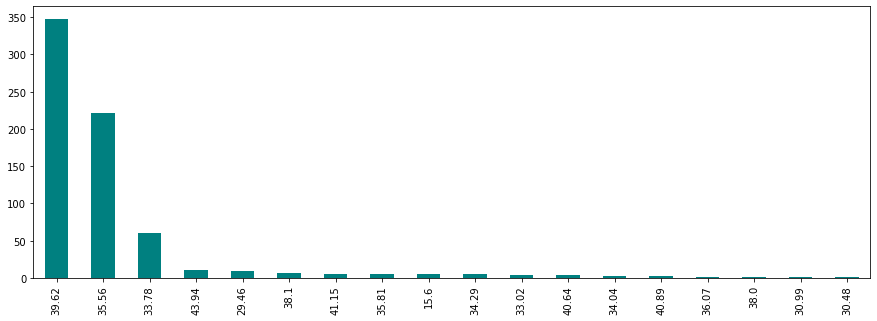

In [98]:
plt.figure(figsize=(15,5))
laptops_data.Display_cm.value_counts().plot.bar(color = 'Teal')
plt.show()

### observation:
1. 39.62cms has high number of laptops listed in dataframe
2. 36.83,36.07,38.86,34.04,40.89 got low numbers in the dataframe

### check count of processor_brand

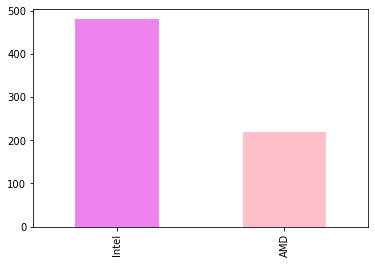

In [99]:
laptops_data.Processor_brand.value_counts().plot.bar(color = ['Violet','Pink'])
plt.show()

### observations : 
In this dataframe intel has high number around 700+ compared to AMD

### check count of Processor_type

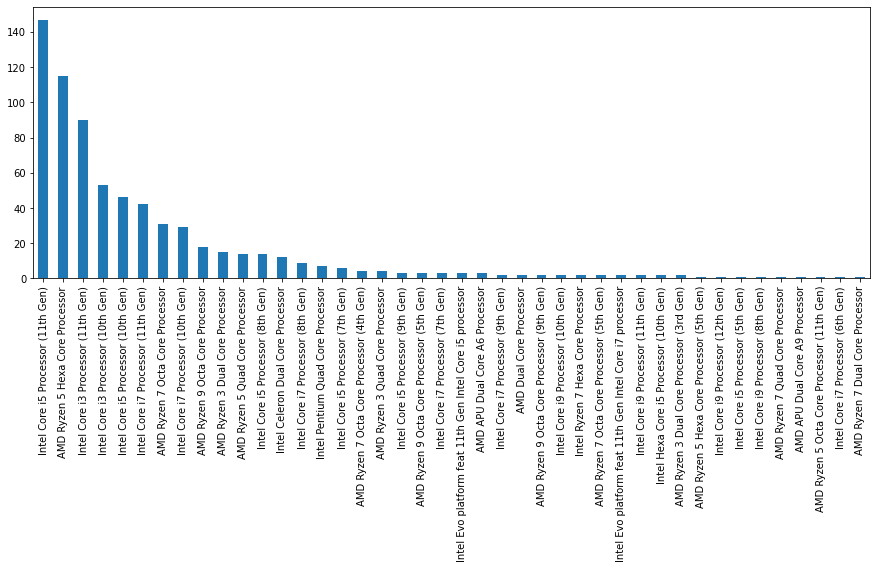

In [100]:
plt.figure(figsize=(15,5))
df1.Processor.value_counts().plot.bar()
plt.show()

### check count of Rom_type

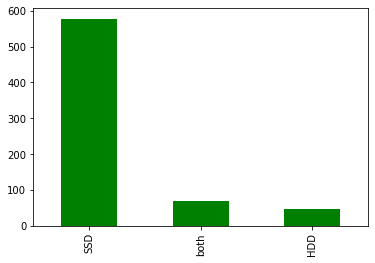

In [101]:
laptops_data.ROM_type.value_counts().plot.bar(color=['Green'])
plt.show()

### observations : 
SSD has high number and HDD has low number

### check count of ROM

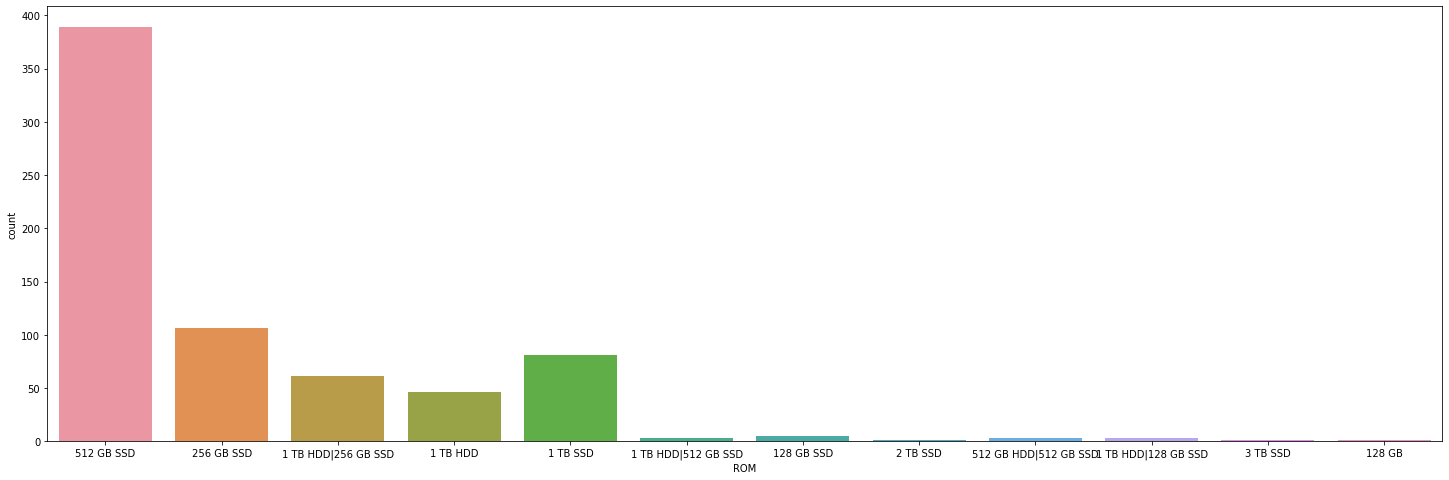

In [102]:
plt.figure(figsize = (25,8))
sns.countplot(x=laptops_data['ROM'])
plt.show()

### observation:
1. The majority of laptops comes with 512 SSD storage
2. Very low number of laptops has 3TB SDD and 128GB

### Laptops range btw 1L to 1.5L

In [103]:
cst = laptops_data[(laptops_data['Price']>=100000) & (laptops_data['Price']<=150000)]

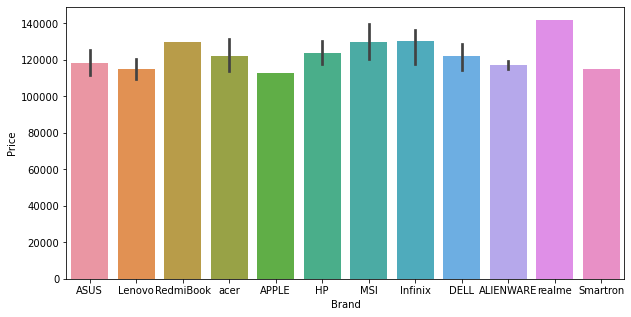

In [104]:
plt.figure(figsize = (10,5))
sns.barplot(x = cst['Brand'], y =cst['Price'])
plt.show()

### Observations:
1. Asus, Lenovo, Redmibook, Acer, Apple, HP, MSI, Infinix, Dell, Alienware, Realme, Smatron are the brands avalible in the proce range of 1L to 1.5L

## Catplot

### Brand v/s price

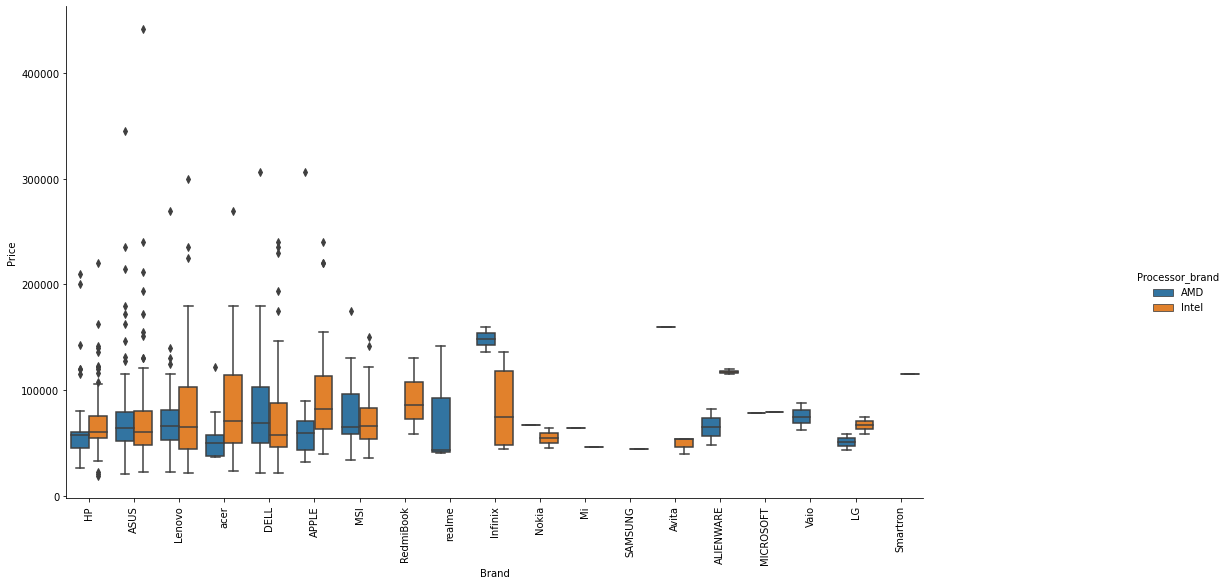

In [105]:
sns.catplot('Brand','Price',data = laptops_data,hue = 'Processor_brand',kind = 'box')
plt.gcf().set_size_inches(20, 8)
plt.xticks(rotation = 90)
plt.show()

### observations:
1. Infinix has AMD procesor which has high median and price density 150000 to 170000
2. The brands like Mi,samsung,Avita,microsoft,,lg,vaio,smartron got low denisty
3. HP,Asus ,Lenovo ,acer,DELL,Apple,MSI, infinix has both type of processors 
4. In max brand the density for AMD is less when compared to Intel 
5. The upper bound is high in all intel processors

### Checking price

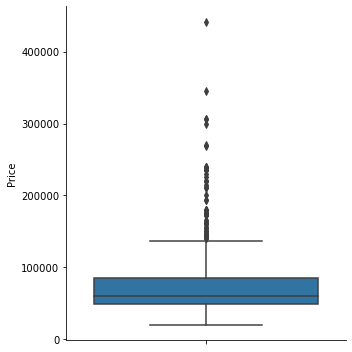

In [106]:
sns.catplot(y = 'Price',data = laptops_data,kind = 'box')
plt.show()

### observations:
1. The price is density is around 40000 to 85000
2. The lower bound is around 10000
3. The upper bound is 140000

## Relplot

### Price vs Rating

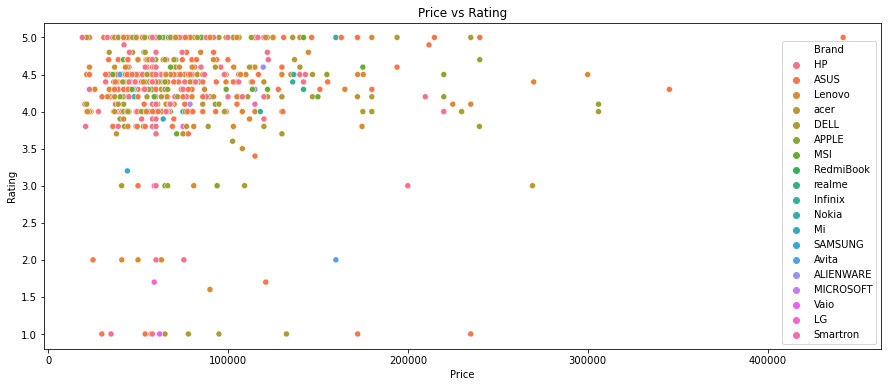

In [107]:
size = (15, 6)
fig, ax = plt.subplots(figsize=size)
plt.title('Price vs Rating')
sns.scatterplot(x='Price', y = 'Rating', hue= 'Brand', data = laptops_data)
plt.show()

### Observations
1. Here we can see that most of the laptops price range lies between probably 30,000 to 100,000
2. Many of the laptops ratings are between 3.7 to 5 
3. Apple, Lenovo, Infinix, Avita, Alienware, Microsoft, Samsung, LG brands seems to have good rating between 3.0 to 5.0
4. There is one outlayer of Asus Brand where price is above 4L and with 5 rating.
5. When price is high rating is also high
6. some of laptops of Asus, Dell, HP, Vaio brands got very less rating(1.0)

### check Ram_GB and  Price 

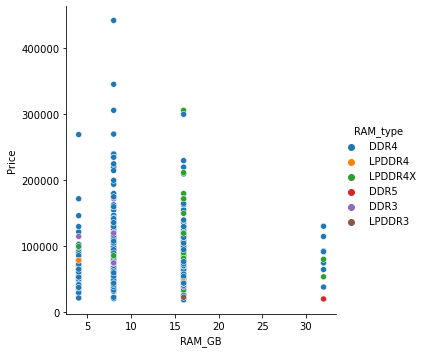

In [108]:
sns.relplot(x = 'RAM_GB',y = 'Price',data = df1 ,hue = 'RAM_type')
plt.show()

### observations:
1. When the Ram increases the lower price and upper price point also increase
2. There is a point in 4 gb Ram which has DDR4 but price is high may be some other factors influences but in this ram the price is high consider it as a outlier
3. In Ram 32 gb it has only DDR4,LPDDR4X,DDR5 ram type

## Pie plot

### Distribution of laptops sold as per Brand

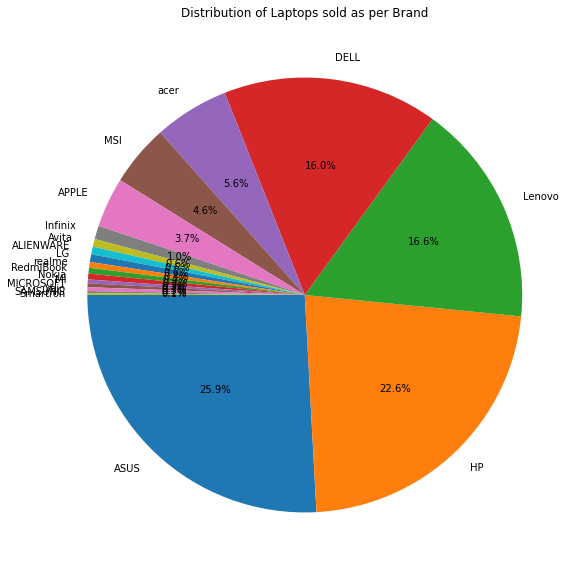

In [134]:
Brand_counts = laptops_data.Brand.value_counts()
Brand_counts
plt.figure(figsize=(10,10))
plt.title('Distribution of Laptops sold as per Brand')
plt.pie(Brand_counts, labels=Brand_counts.index, autopct='%1.1f%%',startangle=180);

### Obervations:
1. The percentage of laptops sold, Asus have the highest market share.
2. HP has the second highest market share.
3. Asus, HP, Lenovo, Dell, Acer, MSI, Apple have percentage above 3 and remaining all below 1 percent.

## DistPlot

### check distribution of price

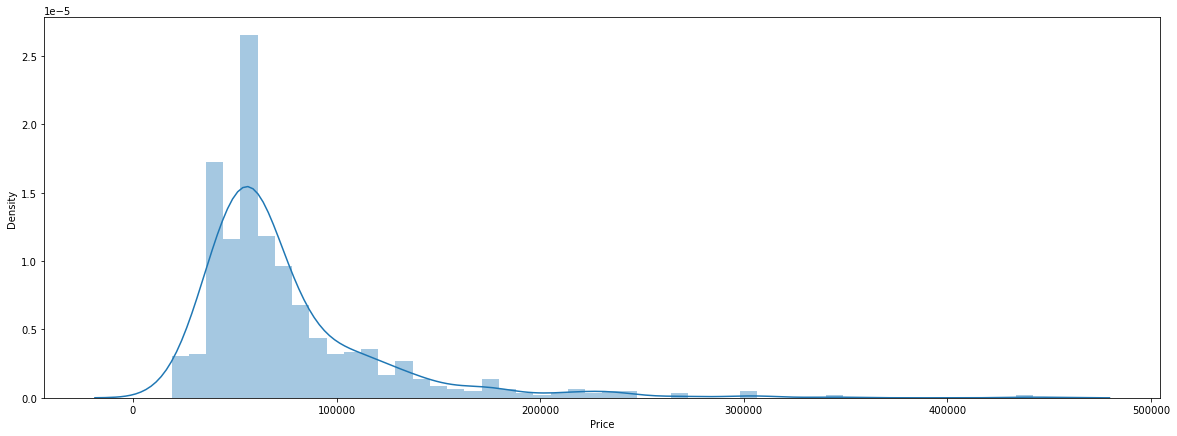

In [110]:
plt.figure(figsize = (20,7))
sns.distplot(laptops_data['Price'])
plt.show()

### Observation:
1. The price is density is around 40000 to 85000
2. Right Skewed or Positive Skewed

## Histogram

#### kind of Rating  Laptops have

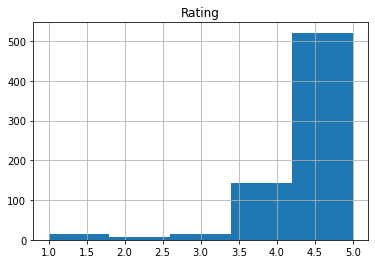

In [111]:
laptops_data.hist('Rating', bins = 5)
plt.show()

### Observations:
1. Here rating is same for from 4.2 to 5   
2. 1.0 to 3.4 has got less number of ratings in this dataframe

## Scatter plot

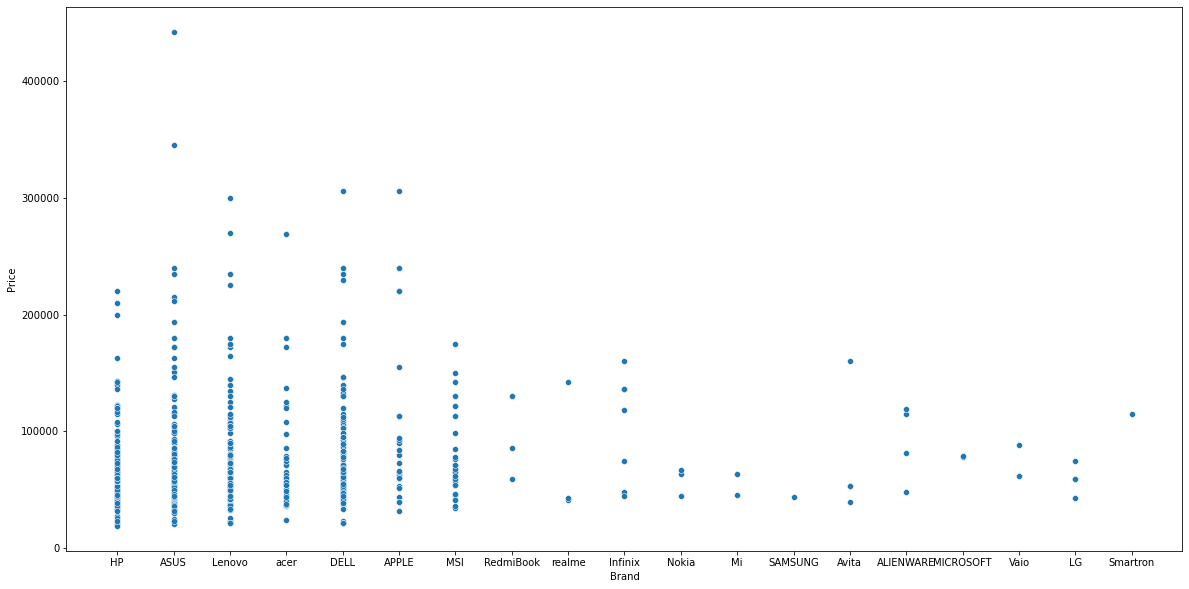

In [112]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'Brand', y ='Price',data = laptops_data)
plt.show()

### Observations:
1. Most of the laptops price range lies between 40,000 to 200,000
2.  HP, Asus, Lenovo, Dell, Apple, MSI brands have more number of laptops and some of the laptops above 200,000
3. Remaining all have less number of laptops and price range below 200,000

### Laptops under range of INR 50,000 and with rating 5

In [104]:
cst = laptops_data[(laptops_data['Price']<=50000) & (laptops_data['Rating']==5.0)]

In [119]:
cst.Brand.value_counts()

DELL      9
ASUS      8
HP        7
Lenovo    6
acer      2
Name: Brand, dtype: int64

In [193]:
cst

,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
15,DELL,DELL Vostro Core i3 10th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,1 TB HDD|256 GB SSD,both,39.62,42240,5.0
25,HP,HP Core i3 11th Gen,64 bit Windows 11 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,47940,5.0
29,ASUS,ASUS VivoBook 15 (2021) Core i3 11th Gen,Windows 10 Operating System,Intel Core i3 Processor (11th Gen),Intel,Core i3,1 Year Carry-In Warranty,4,DDR4,256 GB SSD,SSD,39.62,47940,5.0
34,DELL,DELL Inspiron Core i5 11th Gen,64 bit Windows 11 Operating System,Intel Core i5 Processor (11th Gen),Intel,Core i5,1 Year Onsite Warranty,8,DDR4,1 TB HDD|256 GB SSD,both,35.56,47940,5.0
65,HP,HP Ryzen 5 Hexa Core 5500U,64 bit Windows 11 Operating System,AMD Ryzen 3 Dual Core Processor,AMD,Ryzen 3 Dual Core,1 Years Carry in Warranty,8,DDR4,512 GB SSD,SSD,39.62,38940,5.0
67,Lenovo,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen,64 bit Windows 10 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,35940,5.0
73,ASUS,ASUS VivoBook K15 OLED (2021) Ryzen 5 Hexa Cor...,64 bit Windows 11 Operating System,Intel Core i3 Processor (10th Gen),Intel,Core i3,1 Year Onsite Warranty,8,DDR4,1 TB HDD|256 GB SSD,both,39.62,30940,5.0
107,ASUS,ASUS ROG Strix Ryzen 7 Octa Core 4800H,64 bit Windows 10 Operating System,Intel Core i5 Processor (11th Gen),Intel,Core i5,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,38.10,41200,5.0
113,HP,HP Ryzen 3 Quad Core 5300U,64 bit Windows 11 Operating System,Intel Core i5 Processor (11th Gen),Intel,Core i5,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,35.56,49240,5.0
141,HP,HP Ryzen 3 Quad Core 5300U,64 bit Windows 11 Operating System,Intel Core i5 Processor (11th Gen),Intel,Core i5,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,40940,5.0


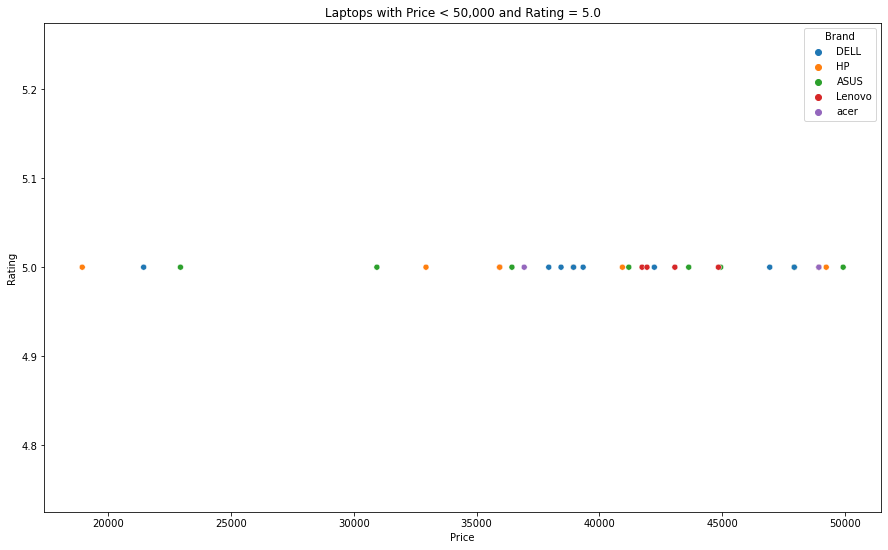

In [105]:
size = (15, 9)
fig, ax = plt.subplots(figsize=size)
plt.title('Laptops with Price < 50,000 and Rating = 5.0')
sns.scatterplot(data=cst,x=cst['Price'], y=cst['Rating'],hue = 'Brand',estimator=np.max)
plt.show()

### Observations:
1. Total number of laptops available within the range are 32   
2. Dell, Asus, HP, Lenovo and Acer brands fall within this range
3. In which Dell has high no. of laptops, i.e, 9 and Acer has less no.of laptops, only 2 
4. HP laptop has 1 laptop which is less than 20,000
5. DELL and Asus have 2 laptops whose price is between 20,000 to 25,000

## Line plot

#### Laptops under 50,000

In [113]:
cst1 = laptops_data[(laptops_data['Price']>=0) & (laptops_data['Price']<=50000)]

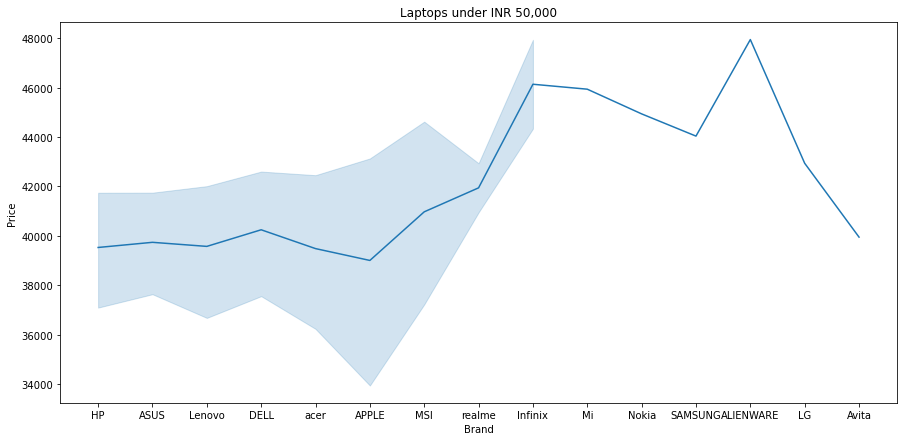

In [114]:
plt.figure(figsize = (15,7))
plt.title('Laptops under INR 50,000')
sns.lineplot(x = cst1['Brand'], y =cst1['Price'])
plt.show()

### Observation:
1. Alienware, Mi and Infinix laptops have high price compared to others
2. Between the price range of 34,000 to 38,000 there no laptops.
3. HP, Asus, Lenovo, Dell, Acer, Apple, MSI, Realme, Infinix, MI, Nokia, Samsung, Alienware, LG, Avita brand fall under this range.

## pairplot

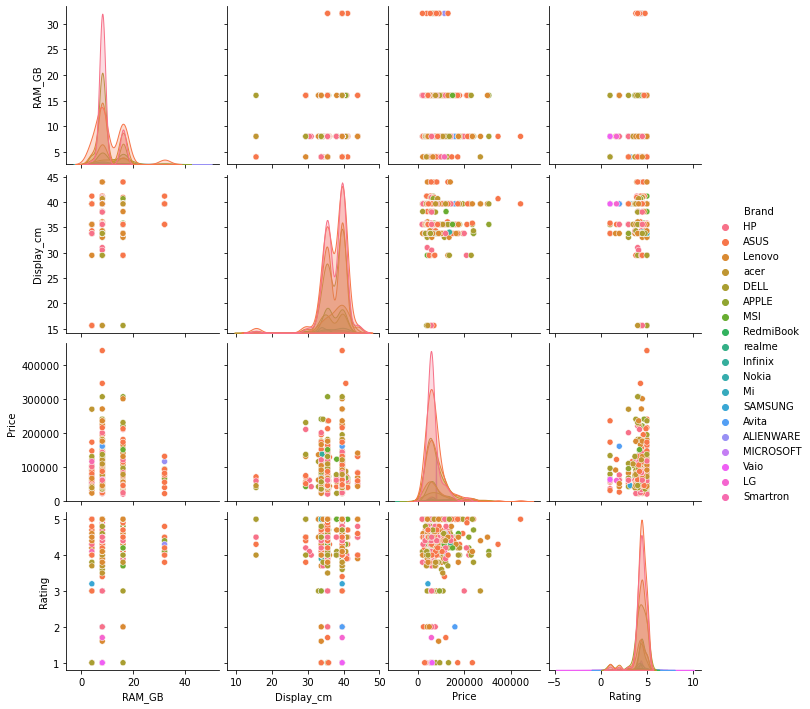

In [115]:
sns.pairplot(laptops_data, hue = 'Brand')
plt.show()

## Heat Map

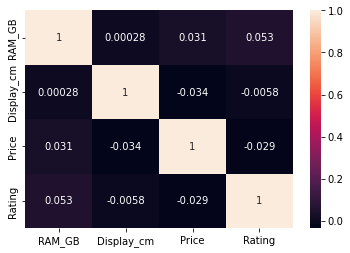

In [116]:
df_corr = laptops_data.corr()
sns.heatmap(df_corr,annot = True)
plt.show()

## What is the average selling price of Apple and Dell brands

In [190]:
avg = laptops_data.groupby('Brand')['Price'].mean()

In [191]:
avg

Brand
ALIENWARE     91091.750000
APPLE         99363.384615
ASUS          75190.292818
Avita         76669.750000
DELL          77389.000000
HP            66574.227848
Infinix      102511.428571
LG            58942.500000
Lenovo        79805.474138
MICROSOFT     78394.500000
MSI           77289.375000
Mi            54940.000000
Nokia         58606.666667
RedmiBook     91606.666667
SAMSUNG       44040.000000
Smartron     114940.000000
Vaio          74940.000000
acer          74910.358974
realme        75276.333333
Name: Price, dtype: float64

### Observations:
1. Avergae selling Price of Apple is 99363.384615
2. Average selling Price of Dell is 77389.000000

## Find the top 15 sold model and which is the highest and lowest sold model with its count

In [240]:
top_model = laptops_data.Name.value_counts().head(15)
top_model

HP Pavilion Ryzen 5 Hexa Core 5500U       32
HP Pavilion Ryzen 5 Hexa Core 5600H       29
DELL Inspiron Core i5 11th Gen            23
HP Core i3 11th Gen                       15
DELL Inspiron Core i3 11th Gen            11
DELL Vostro Core i3 10th Gen               8
DELL Vostro Core i5 11th Gen               7
DELL Core i5 11th Gen                      7
acer Aspire 5 Core i5 11th Gen             7
Lenovo Core i3 10th Gen                    7
APPLE 2021 Macbook Pro M1 Pro              6
DELL Inspiron Ryzen 3 Dual Core 3250U      6
Lenovo IdeaPad 3 Core i3 10th Gen          6
HP Pavilion Core i5 11th Gen               6
DELL Inspiron Core i3 10th Gen             5
Name: Name, dtype: int64

## Observations:
1. The highest sold Model is 'HP Pavilion Ryzen 5 Hexa Core 5500U' : 32
2. The lowest sold model is 'DELL Inspiron Core i3 10th Gen'  : 5

## What is the cheapest and costliest product sold

In [220]:
laptops_data[laptops_data['Price'] == laptops_data['Price'].min()]

,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
569,HP,HP Pavilion Gaming Core i7 11th Gen,64 bit Windows 11 Operating System,Intel Core i5 Processor (10th Gen),Intel,Core i5,3 Year Premier Support Warranty,16,DDR4,512 GB SSD,SSD,35.56,18940,5.0


### Observation:
'HP Pavilion Gaming Core i7 11th Gen' is the cheapest product sold

In [222]:
laptops_data[laptops_data['Price'] == laptops_data['Price'].max()]

,Brand,Name,Operating System,Processor,Processor_brand,Processor_type,Warranty,RAM_GB,RAM_type,ROM,ROM_type,Display_cm,Price,Rating
624,ASUS,ASUS Core i3 10th Gen,64 bit Windows 11 Operating System,Intel Core i5 Processor (8th Gen),Intel,Core i5,1 Year Onsite Warranty,8,DDR4,512 GB SSD,SSD,39.62,441940,5.0


### Observation:
'ASUS Core i3 10th Gen' is the costliest product sold

# Inferences and Conclusion

#### The data used in this analysis was flipkart sales data of all the laptop brands.

1. Asus Brand has high number of laptops and highest market share among all.
2. Overall we can say that rating of many of laptops are more 3.0 and very less no.of laptops have low rating.
3. Mostly the laptops price range lies between probably INR 30,000 to INR 100,000
4. Samsung and Smartron brands have only 1 laptop in this data frame
5. We can find many good laptops in the price range below INR 50,000 and with good rating.
6. 'HP Pavilion Gaming Core i7 11th Gen' is the cheapest product sold.
7. 'ASUS Core i3 10th Gen' is the costliest product sold.